# Fig. 6
This notebook load and combine the output files produced by the script `power.py`  to produce the figure shown in the paper.

Output from ```power.py``` are saved in pickle files with name `"theta_"+str(theta)+':_eta_'+str(eta)+specifier+".pkl"`.
Multiple outputs at the same theta are saved with different unique identifiers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import pickle
from matplotlib.colors import LogNorm
import os
import re
import sys
sys.path.insert(0, "../../lib")  # add the library folder to the path I look for modules
sys.path.insert(0, "../heterogeneity/")
import latexify
from utilities import make_network
#import random_regular
#import dynamical_cavity as cavity

In [2]:

def load_obj(theta,eta,specifier = ''):
    name='theta_'+str(theta)+'_eta_'+str(eta)+specifier+'.pkl'
    with open(directory+'/data/dic-' + name , 'rb') as f:
        return pickle.load(f)
def load_data(directory):
    filenames=os.listdir(directory+"/data")
    pattern = re.compile("dic-theta_\d*\.\d_eta_\d*\.\d|\d.pkl")

    dictnames=[name  for name in filenames if pattern.match(name)]# select only dictionary files
    print(' Results are available in the files:')
    params = []
    for filename in dictnames:
        params+=[filename.lstrip('dic-theta_').rstrip('.pkl').split('_eta_')]
    params = pd.DataFrame(params,columns= ['theta','eta'],dtype=float).sort_values(by = ['theta','eta'])
    latexify.latexify(columns = 2)
    mean_mean = []
    mean_cav = []
    for theta, eta in params.values:
        dic = load_obj(theta,eta)
        mean_mean+= [dic['mean_mean']]
        mean_cav += [dic['mean_cav']]
    mean_cav = np.array(mean_cav)
    mean_mean = np.array(mean_mean)
    return params,mean_cav,mean_mean

 Results are available in the files:


<ipython-input-11-ae60464e0da2>:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  plt.text(0.65,mean_cav[[(params['theta']==0)&(params['eta']==0.5)]]+0.0,'$\\vartheta = 0$',c = colors[0],fontsize = 12)
<ipython-input-11-ae60464e0da2>:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  plt.text(0.65,mean_cav[[(params['theta']==0.5)&(params['eta']==0.5)]]-0.1, '$\\vartheta/J = 0.5$',c = colors[2],fontsize = 12)


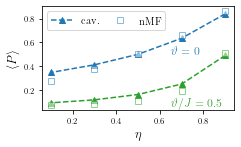

In [11]:
directory = 'gamma=3'
params,mean_cav,mean_mean = load_data(directory)
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
etas = 1-np.array(list(params['eta'][params['theta']==0]))
plt.plot(etas,mean_cav[params['theta']==0],'--^',c = colors[0],label = 'cav.')
plt.plot(etas,mean_mean[params['theta']==0],'s',c = colors[0],mfc= 'w',alpha = 0.5,label = 'nMF')
etas = 1-np.array(list(params['eta'][params['theta']==0.5]))
plt.plot(etas,mean_cav[params['theta']==0.5],'--^',c = colors[2])
plt.plot(etas,mean_mean[params['theta']==0.5],'s',c = colors[2],mfc= 'w',alpha = 0.5)
plt.text(0.65,mean_cav[[(params['theta']==0)&(params['eta']==0.5)]]+0.0,'$\\vartheta = 0$',c = colors[0],fontsize = 12)
plt.text(0.65,mean_cav[[(params['theta']==0.5)&(params['eta']==0.5)]]-0.1, '$\\vartheta/J = 0.5$',c = colors[2],fontsize = 12)
plt.ylabel('$\\langle P\\rangle$',fontsize = 13)
plt.xlabel('$\\eta$',fontsize = 13)
plt.legend(ncol = 2,fontsize = 10.5,numpoints = 1,columnspacing=1)
plt.tight_layout()
#plt.savefig(directory+'_mean_field.pdf')

In [4]:
params,mean_cav,mean_mean = load_data(directory)
params

 Results are available in the files:


,theta,eta
9,0.0,0.1
3,0.0,0.3
2,0.0,0.5
0,0.0,0.7
6,0.0,0.9
8,0.5,0.1
4,0.5,0.3
1,0.5,0.5
7,0.5,0.7
5,0.5,0.9


In [12]:
directory = 'kin=3'
params,mean_cav,mean_mean = load_data(directory)
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
params
list(params['eta'][params['theta']==0.5])

 Results are available in the files:


[0.1, 0.3, 0.5, 0.7, 0.9]

<ipython-input-14-19022af1e2e0>:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  plt.text(0.35,mean_cav[[(params['theta']==0)&(params['eta']==0.3)]]-0.15,'$\\vartheta = 0$',c = colors[0],fontsize = 12)
<ipython-input-14-19022af1e2e0>:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  plt.text(0.35,mean_cav[[(params['theta']==0.5)&(params['eta']==0.3)]]-0.52,'$\\vartheta/J = 0.5$',c = colors[2],fontsize = 12)


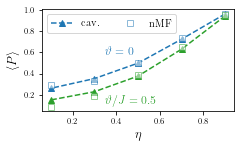

In [14]:
etas = 1-np.array(list(params['eta'][params['theta']==0]))
plt.plot(etas,mean_cav[params['theta']==0],'--^',c = colors[0],label = 'cav.')
plt.plot(etas,mean_mean[params['theta']==0],'s',c = colors[0],mfc= 'w',alpha = 0.5,label = 'nMF')
etas = 1-np.array(list(params['eta'][params['theta']==0.5]))
plt.plot(etas,mean_cav[params['theta']==0.5],'--^',c = colors[2])
plt.plot(etas,mean_mean[params['theta']==0.5],'s',c = colors[2],mfc= 'w',alpha = 0.5)
plt.text(0.35,mean_cav[[(params['theta']==0)&(params['eta']==0.3)]]-0.15,'$\\vartheta = 0$',c = colors[0],fontsize = 12)
plt.text(0.35,mean_cav[[(params['theta']==0.5)&(params['eta']==0.3)]]-0.52,'$\\vartheta/J = 0.5$',c = colors[2],fontsize = 12)
plt.ylabel('$\\langle P\\rangle$',fontsize = 13)
plt.xlabel('$\\eta$',fontsize = 13)
plt.legend(ncol = 2,fontsize = 10.5,numpoints = 1)
plt.tight_layout()
#plt.savefig(directory+'_mean_field.pdf')

In [27]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors[0]

'#1f77b4'

$$
\frac{1}{2}\left[ 1+P_j \tanh\frac{\beta(\pm J-\theta)}{2}-(1-P_j)\tanh\frac{\beta(\theta)}{2}\right]
$$

In [148]:
def mean_field(P, js, T, interaction, N, Ks, theta=0, precision=1e-4, max_iter=50):
    """
    Run the dynamical cavity with recursive calls.
    :param P_init: list of floats of length N
    :param T: float
    :param J: sparse.csr_matrix
    :param theta: float (in units of 1/sqrt(<K>))
    :param max_iter: int
    :param precision: float
    :return: P_new it is a  list of dimensions N which contains the probability of active state for each gene.
    In order to help storing, couplings are taken to be +-1, bias is then rescaled by 1/sqrt(<|J_{ij}|>)
    """
    avg_degree = np.mean(Ks)
    P_new = np.zeros(N)
    for count in range(max_iter):
        for i,(inter,j) in enumerate(zip(interaction,js)):
            P_new[i] = 0.5*(1+np.tanh((sum(inter*P[j])-theta)/2/T/ np.sqrt(avg_degree)))
        if max(np.abs(np.array(P) - np.array(P_new))) < precision:
            P = P_new
            print('finishing after', count, 'iterations')
            break
        if count == max_iter-1:
            print("Maximum number of repetition reached, but target  precision has not been reached. ")
        P = P_new.copy()

    return P


In [155]:
N = 100000
gamma =3#1.81
bias = 0.3 #0.379
#J = make_network(N,gamma,bias)
J = random_regular.make_network(N,3,bias)
N = J.shape[0]
J.data = np.where(J.data > 0, 1, -1)
N = J.shape[0]
J_transpose = J.transpose().tolil()
js = J_transpose.rows  # list of list, structure is [el[i]] where el[i]
# is the list of  predecessors of gene i ( the index)
interaction = J_transpose.data  # list of list, structure is [el[i]]
# where el[i] is the list of  predecessors of gene i (interaction strength with sign)
Ks = np.array([len(neigh) for neigh in js])  # in degree of each gene
J0 = 1/np.sqrt(Ks.mean())


Comparison mean field vs hetherogeneous. Mean field is:
$$
P_i = \frac{1}{2}\left(1+\tanh \frac{\beta}{2}\sum_j J_{ij}P_j \right)
$$


In [156]:
theta=0.
T=0.2
%time P=cavity.cavity(np.random.rand(N), js, T*J0, interaction, N, Ks, theta*J0,J0)
%time P_mean=mean_field(np.random.rand(N), js, T*J0, interaction, N, Ks, theta*J0)

CPU times: user 6.41 s, sys: 0 ns, total: 6.41 s
Wall time: 6.41 s
finishing after 31 iterations
CPU times: user 20.4 s, sys: 398 ms, total: 20.8 s
Wall time: 20.4 s


(0.7282065971820334, 0.7405707221495154, 0.016695400719589526)

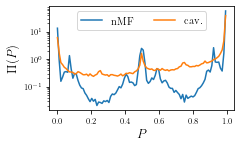

In [158]:
latexify.latexify(columns = 2)
avg_degree = np.mean(Ks)
def plus(P):
    return 0.5*(1-np.tanh(theta/np.sqrt(avg_degree)/2/T)+P*(np.tanh((1-theta)/np.sqrt(avg_degree)/2/T)+np.tanh(theta/np.sqrt(avg_degree)/2/T)))
def minus(P):
    return 0.5*(1-np.tanh(theta/np.sqrt(avg_degree)/2/T)+P*(np.tanh((-1-theta)/np.sqrt(avg_degree)/2/T)+np.tanh(theta/np.sqrt(avg_degree)/2/T)))

h,b = np.histogram(P_mean,np.linspace(0,1,100),density=True)
plt.plot(b[:-1],h,label = 'nMF')
h,b = np.histogram(P,bins = b,density=True)
plt.plot(b[:-1],h,'-',alpha = 1.,label = 'cav.')
plt.legend(loc = 'upper center',ncol = 2,fontsize = 10.5)

'''
x = (1-np.tanh(theta/np.sqrt(avg_degree)/2/T))/(2-(np.tanh((1-theta)/np.sqrt(avg_degree)/2/T)+np.tanh(theta/np.sqrt(avg_degree)/2/T)))
y = (1-np.tanh(theta/np.sqrt(avg_degree)/2/T))/(2-(np.tanh((-1-theta)/np.sqrt(avg_degree)/2/T)+np.tanh(theta/np.sqrt(avg_degree)/2/T)))

plt.axvline(x)
plt.axvline(y, ls = ':', c= 'r')
plt.axvline(plus(y), ls = ':', c= 'r')
plt.axvline(minus(x),ls = '--')
plt.axvline(minus(minus(x)),ls = '-.')
plt.axvline(plus(minus(x)),ls = '-.')
'''
plt.semilogy()
plt.xlabel('$P$',fontsize = 13)
plt.ylabel('$\\Pi(P)$',fontsize = 13)
plt.tight_layout()
#plt.savefig('random_regular_comparison.pdf')
#plt.savefig('power_law_comparison.pdf')
np.mean(P),np.mean(P_mean),1-abs(np.mean(P)/np.mean(P_mean))

In [104]:
1/np.sqrt(np.mean(Ks)),1/np.sqrt(3)

(0.9119935574084287, 0.5773502691896258)

1.20231

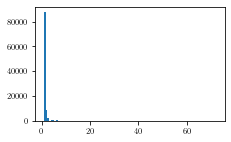

In [103]:
_ = plt.hist(Ks,100)


In [105]:
params

,theta,eta
2,0.0,0.0
11,0.0,0.1
5,0.0,0.3
4,0.0,0.5
1,0.0,0.7
8,0.0,0.9
0,0.5,0.0
10,0.5,0.1
6,0.5,0.3
3,0.5,0.5
